In [1]:
%matplotlib inline

In [2]:
from matplotlib import lines as mlines

In [3]:
import os
drn = "/Users/aphearin/work/DATA/SPS_validation/FSPS_ssp_data"

lg_ages = np.load(os.path.join(drn, "log_age.npy"))

In [4]:
import fsps

In [5]:
imf_types = [0, 1, 2, 3, 4]

zmet = 20

In [6]:
result_collector = []
for imf_type in imf_types:
    res = fsps.StellarPopulation(
        zcontinuous=0, zmet=zmet, imf_type=imf_type, add_stellar_remnants=False).stellar_mass
    result_collector.append(res)

In [7]:
result_collector2 = []
for imf_type in imf_types:
    res = fsps.StellarPopulation(
        zcontinuous=0, zmet=zmet, imf_type=imf_type, add_stellar_remnants=True).stellar_mass
    result_collector2.append(res)

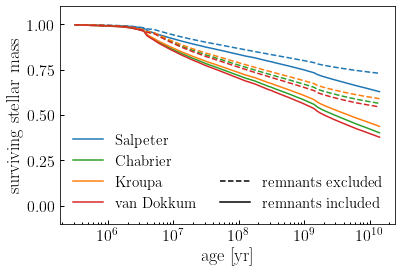

In [8]:
fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(-0.1, 1.1)
xscale = ax.set_xscale('log')
__=ax.plot(10**lg_ages, result_collector[0], color=mblue, label=r'${\rm Salpeter}$')
__=ax.plot(10**lg_ages, result_collector[1], color=mgreen, label=r'${\rm Chabrier}$')
__=ax.plot(10**lg_ages, result_collector[2], color=morange, label=r'${\rm Kroupa}$')
__=ax.plot(10**lg_ages, result_collector[3], color=mred, label=r'${\rm van\ Dokkum}$')

__=ax.plot(10**lg_ages, result_collector2[0], '--', color=mblue)
__=ax.plot(10**lg_ages, result_collector2[1], '--', color=mgreen)
__=ax.plot(10**lg_ages, result_collector2[2],'--',  color=morange)
__=ax.plot(10**lg_ages, result_collector2[3], '--', color=mred, label=r'${\rm remnants\ excluded}$')

leg = ax.legend()
xlabel = ax.set_xlabel(r'${\rm age\ [yr]}$')
ylabel = ax.set_ylabel(r'${\rm surviving\ stellar\ mass}$')

blue_line=mlines.Line2D([],[],ls='-',c=mblue,label=r'${\rm Salpeter}$')
green_line=mlines.Line2D([],[],ls='-',c=mgreen,label=r'${\rm Chabrier}$')
orange_line=mlines.Line2D([],[],ls='-',c=morange,label=r'${\rm Kroupa}$')
red_line=mlines.Line2D([],[],ls='-',c=mred,label=r'${\rm van\ Dokkum}$')
solid_line=mlines.Line2D([],[],ls='-',c='k',label=r'${\rm remnants\ included}$')
dashed_line=mlines.Line2D([],[],ls='--',c='k',label=r'${\rm remnants\ excluded}$')
leg1=ax.legend(handles=[blue_line, green_line, orange_line, red_line], loc='lower left')
__ = plt.gca().add_artist(leg1)
leg2=ax.legend(handles=[dashed_line, solid_line], loc='lower right')

fig.savefig('surviving_mstar_imf_dependence.png', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)

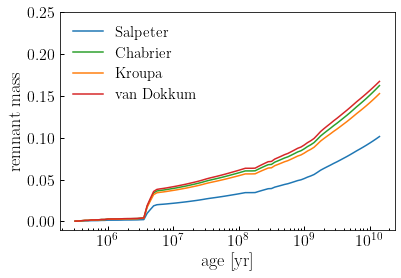

In [9]:
fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(-0.01, 0.25)
xscale = ax.set_xscale('log')
__=ax.plot(10**lg_ages, result_collector2[0]-result_collector[0], color=mblue, label=r'${\rm Salpeter}$')
__=ax.plot(10**lg_ages, result_collector2[1]-result_collector[1], color=mgreen, label=r'${\rm Chabrier}$')
__=ax.plot(10**lg_ages, result_collector2[2]-result_collector[2], color=morange, label=r'${\rm Kroupa}$')
__=ax.plot(10**lg_ages, result_collector2[3]-result_collector[3], color=mred, label=r'${\rm van\ Dokkum}$')

xlabel = ax.set_xlabel(r'${\rm age\ [yr]}$')
ylabel = ax.set_ylabel(r'${\rm remnant\ mass}$')
leg = ax.legend()
fig.savefig('remnant_mass_imf_dependence.png', 
            bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200)

In [10]:
drn2 = "/Users/aphearin/work/repositories/python/dsps/dsps/tests/testing_data"
np.savetxt(os.path.join(drn2, 'lg_ages_mstar_surviving.txt'), lg_ages)

np.savetxt(os.path.join(drn2, 'salpeter_mstar_surviving_norem.txt'), result_collector[0])
np.savetxt(os.path.join(drn2, 'chabrier_mstar_surviving_norem.txt'), result_collector[1])
np.savetxt(os.path.join(drn2, 'kroupa_mstar_surviving_norem.txt'), result_collector[2])
np.savetxt(os.path.join(drn2, 'van_dokkum_mstar_surviving_norem.txt'), result_collector[3])

np.savetxt(os.path.join(drn2, 'salpeter_mstar_surviving.txt'), result_collector2[0])
np.savetxt(os.path.join(drn2, 'chabrier_mstar_surviving.txt'), result_collector2[1])
np.savetxt(os.path.join(drn2, 'kroupa_mstar_surviving.txt'), result_collector2[2])
np.savetxt(os.path.join(drn2, 'van_dokkum_mstar_surviving.txt'), result_collector2[3])